<a href="https://colab.research.google.com/github/suhayl7/Suhayl-s-Portfolio/blob/main/Rio_Data_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import svm, preprocessing
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats

from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import xgboost as xgb
from sklearn.metrics import r2_score

import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F

import random
np.random.seed(42)
random.seed(42)


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving listings[1].csv to listings[1].csv


In [ ]:
seat = pd.read_csv(r"listings[1].csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
seat.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within 

In [ ]:
seat.shape

(33715, 106)

In [ ]:
seat.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.371500e+04,3.371500e+04,0.0,0.0,0.0,3.371500e+04,0.0,33695.000000,33695.000000,0.0,33715.000000,33715.000000,33715.000000,33661.000000,33673.000000,33667.000000,495.000000,33715.000000,33715.000000,3.371500e+04,33715.000000,33715.000000,3.371500e+04,3.371500e+04,33715.000000,3.371500e+04,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,18293.000000,18275.00000,18280.000000,18274.000000,18280.000000,18277.000000,18278.000000,0.0,33715.000000,33715.000000,33715.000000,33715.000000,19149.000000
mean,1.837737e+07,2.019112e+13,NaN,NaN,NaN,7.333110e+07,NaN,7.347559,7.347559,NaN,-22.965208,-43.254228,4.199941,1.694765,1.646126,2.574242,498.751515,1.718434,4.789826,9.571741e+02,4.677325,5.279164,9.536130e+02,9.565083e+02,4.814341,9.557378e+02,15.476553,30.368234,47.661516,177.956251,9.374344,3.524396,94.777565,9.65658,9.431565,9.802561,9.775656,9.748044,9.332093,NaN,5.996292,5.112383,0.702862,0.079638,0.707232
std,1.182836e+07,0.000000e+00,NaN,NaN,NaN,7.577773e+07,NaN,32.194777,32.194777,NaN,0.035244,0.097488,2.625252,1.508228,1.075649,2.121490,931.444840,1.585645,22.640328,5.473614e+04,21.651351,22.298511,5.473616e+04,5.473614e+04,21.762781,5.473614e+04,13.024685,24.678858,37.328647,149.766863,24.815311,8.185492,9.141386,0.88463,1.079031,0.713238,0.744620,0.734016,1.016906,NaN,20.303420,19.782263,1.475525,0.618935,0.927453
min,1.787800e+04,2.019112e+13,NaN,NaN,NaN,1.173900e+04,NaN,0.000000,0.000000,NaN,-23.073400,-43.737090,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.026686e+07,2.019112e+13,NaN,NaN,NaN,1.431560e+07,NaN,1.000000,1.000000,NaN,-22.984710,-43.323360,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,1.100000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,10.00000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.425308e+07,2.019112e+13,NaN,NaN,NaN,5.277714e+07,NaN,1.000000,1.000000,NaN,-22.970850,-43.200220,4.000000,1.000000,1.000000,2.000000,161.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.300000,1.125000e+03,19.000000,34.000000,56.000000,165.000000,1.000000,0.000000,98.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.340000
75%,2.991364e+07,2.019112e+13,NaN,NaN,NaN,9.143910e+07,NaN,3.000000,3.000000,NaN,-22.946725,-43.187085,6.000000,2.000000,2.000000,3.000000,700.000000,2.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,29.000000,57.000000,87.000000,350.000000,6.000000,3.000000,100.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.980000
max,4.029091e+07,2.019112e+13,NaN,NaN,NaN,3.111796e+08,NaN,1259.000000,

In [ ]:
seat = seat.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'], axis = 1)

In [ ]:
seat['price'] = seat['price'].str.replace(r'\W', "")
seat['price'] = seat['price'].astype(int) 
seat['price'] = seat['price']/100
seat['price'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    332.0
1    160.0
2    273.0
3    378.0
4    130.0
Name: price, dtype: float64

In [ ]:
seat.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.371500e+04,3.371500e+04,0.0,0.0,0.0,3.371500e+04,0.0,33695.000000,33695.000000,33715.000000,33715.000000,33715.000000,33673.000000,33667.000000,495.000000,33715.000000,33715.000000,33715.000000,3.371500e+04,33715.000000,33715.000000,3.371500e+04,3.371500e+04,33715.000000,3.371500e+04,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,18293.000000,18275.00000,18280.000000,18274.000000,18280.000000,18277.000000,18278.000000,0.0,33715.000000,33715.000000,33715.000000,33715.000000,19149.000000
mean,1.837737e+07,2.019112e+13,NaN,NaN,NaN,7.333110e+07,NaN,7.347559,7.347559,-22.965208,-43.254228,4.199941,1.646126,2.574242,498.751515,651.860537,1.718434,4.789826,9.571741e+02,4.677325,5.279164,9.536130e+02,9.565083e+02,4.814341,9.557378e+02,15.476553,30.368234,47.661516,177.956251,9.374344,3.524396,94.777565,9.65658,9.431565,9.802561,9.775656,9.748044,9.332093,NaN,5.996292,5.112383,0.702862,0.079638,0.707232
std,1.182836e+07,0.000000e+00,NaN,NaN,NaN,7.577773e+07,NaN,32.194777,32.194777,0.035244,0.097488,2.625252,1.075649,2.121490,931.444840,1695.447098,1.585645,22.640328,5.473614e+04,21.651351,22.298511,5.473616e+04,5.473614e+04,21.762781,5.473614e+04,13.024685,24.678858,37.328647,149.766863,24.815311,8.185492,9.141386,0.88463,1.079031,0.713238,0.744620,0.734016,1.016906,NaN,20.303420,19.782263,1.475525,0.618935,0.927453
min,1.787800e+04,2.019112e+13,NaN,NaN,NaN,1.173900e+04,NaN,0.000000,0.000000,-23.073400,-43.737090,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.026686e+07,2.019112e+13,NaN,NaN,NaN,1.431560e+07,NaN,1.000000,1.000000,-22.984710,-43.323360,2.000000,1.000000,1.000000,0.000000,151.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,1.100000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,10.00000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.425308e+07,2.019112e+13,NaN,NaN,NaN,5.277714e+07,NaN,1.000000,1.000000,-22.970850,-43.200220,4.000000,1.000000,2.000000,161.000000,290.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.300000,1.125000e+03,19.000000,34.000000,56.000000,165.000000,1.000000,0.000000,98.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.340000
75%,2.991364e+07,2.019112e+13,NaN,NaN,NaN,9.143910e+07,NaN,3.000000,3.000000,-22.946725,-43.187085,6.000000,2.000000,3.000000,700.000000,600.000000,2.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,29.000000,57.000000,87.000000,350.000000,6.000000,3.000000,100.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.980000
max,4.029091e+07,2.019112e+13,NaN,NaN,NaN,3.111796e+08,NaN,1259.000000,1259.000000,-22.750380,-43.104060,160.000000,20.00

In [ ]:
seat.shape

(33715, 102)

In [ ]:
max_thresold = seat['price'].quantile(0.90)
min_thresold = seat['price'].quantile(0.05)

In [ ]:
seat = seat[(seat.price < max_thresold) & (seat.price > min_thresold)]

In [ ]:
seat.shape

(28472, 102)

In [ ]:
seat.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               39
summary                                          1742
space                                           10588
description                                       781
experiences_offered                                 0
neighborhood_overview                           12130
notes                                           18683
transit                                         12164
access                                          14725
interaction                                     13918
house_rules                                     13388
thumbnail_url                                   28472
medium_url                                      28472
picture_url                                         0
xl_picture_url              

In [ ]:
seat = seat.drop(['neighborhood_overview', 'host_about', 'neighbourhood', 'host_neighbourhood'], axis = 1)

In [ ]:
seat.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               39
summary                                          1742
space                                           10588
description                                       781
experiences_offered                                 0
notes                                           18683
transit                                         12164
access                                          14725
interaction                                     13918
house_rules                                     13388
thumbnail_url                                   28472
medium_url                                      28472
picture_url                                         0
xl_picture_url                                  28472
host_id                     

In [ ]:
seat.select_dtypes('object').loc[:, seat.isna().sum() > 0].columns

Index(['name', 'summary', 'space', 'description', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_has_profile_pic', 'host_identity_verified', 'city', 'state',
       'zipcode', 'market', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'first_review', 'last_review'],
      dtype='object')

In [ ]:
seat = seat.drop(['name', 'description', 'host_name', 'host_since', 'host_location', 'host_thumbnail_url', 
           'host_picture_url', 'host_has_profile_pic', 'host_identity_verified', 'first_review', 'last_review'], axis = 1)

In [ ]:
seat = seat.drop(['host_response_rate', 'host_acceptance_rate'], axis = 1)

In [ ]:
# Impute using constant value

for column in ['host_is_superhost']:
  seat[column] = seat[column].fillna("f")

# Impute using column mode

for column in ['host_response_time']:
  seat[column] = seat[column].fillna(seat[column].mode()[0])

In [ ]:
seat.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
summary                                          1742
space                                           10588
experiences_offered                                 0
notes                                           18683
transit                                         12164
access                                          14725
interaction                                     13918
house_rules                                     13388
thumbnail_url                                   28472
medium_url                                      28472
picture_url                                         0
xl_picture_url                                  28472
host_id                                             0
host_url                                            0
host_response_time          

In [ ]:
seat.columns[seat.isna().sum() > 0]

Index(['summary', 'space', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_listings_count', 'host_total_listings_count', 'city', 'state',
       'zipcode', 'market', 'bedrooms', 'beds', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'jurisdiction_names', 'reviews_per_month'],
      dtype='object')

In [ ]:
def fill_mean(df, column):
    
    df = df.copy()
    
    df[column] = df[column].fillna(df[column].mean()) 
    
    return df

In [ ]:
for column in [
    'host_listings_count',
    'host_total_listings_count',
    'bedrooms',
    'beds',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
    
]:
    seat = fill_mean(seat, column)

In [ ]:
seat = seat.drop(['notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
                  'xl_picture_url', 'city', 'state', 'zipcode', 'market', 'square_feet', 'weekly_price', 'monthly_price',
                  'security_deposit', 'cleaning_fee', 'jurisdiction_names'], axis = 1)

In [ ]:

seat.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
summary                                          1742
space                                           10588
experiences_offered                                 0
host_id                                             0
host_url                                            0
host_response_time                                  0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
street                                              0
neighbourhood_cleansed                              0
smart_location                                      0
country_code                                        0
country                     

In [ ]:
seat.shape

(28472, 66)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


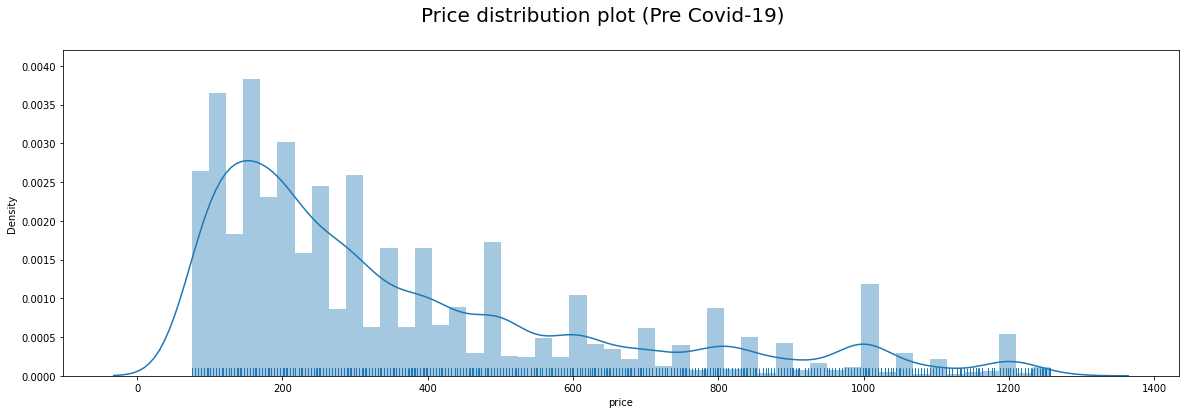

In [ ]:
fig = plt.figure(figsize = (20,6))
fig.suptitle('Price distribution plot (Pre Covid-19)', fontsize=20)
sb.distplot(seat['price'], rug = True)


In [ ]:
seat['log_price'] = np.log(seat['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


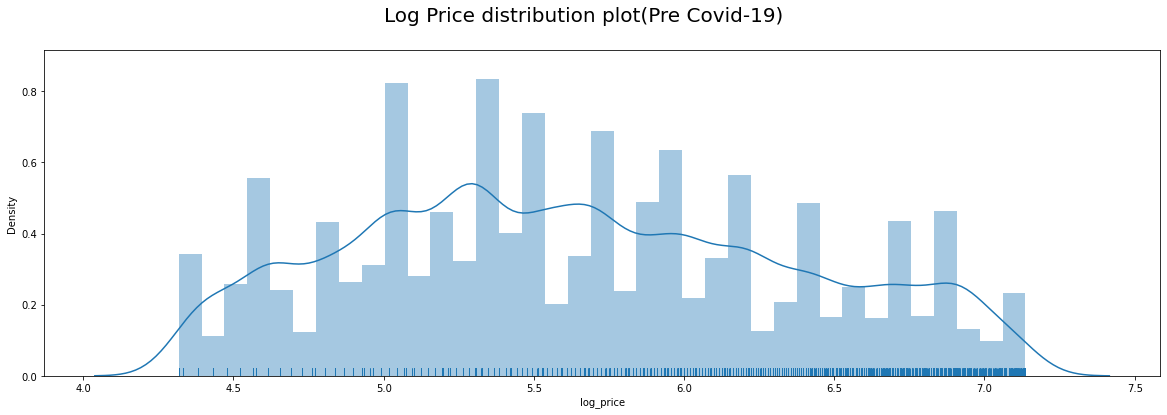

In [ ]:
fig = plt.figure(figsize = (20,6))
fig.suptitle('Log Price distribution plot(Pre Covid-19)', fontsize=20)
sb.distplot(seat['log_price'], rug = True)

In [ ]:
seat['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
print(sorted(seat['neighbourhood_cleansed'].unique()))

['Abolição', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Anil', 'Bancários', 'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba', 'Barros Filho', 'Benfica', 'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Brás de Pina', 'Cachambi', 'Cacuia', 'Caju', 'Camorim', 'Campinho', 'Campo Grande', 'Campo dos Afonsos', 'Cascadura', 'Catete', 'Catumbi', 'Cavalcanti', 'Centro', 'Cidade Nova', 'Cidade de Deus', 'Cocotá', 'Colégio', 'Complexo do Alemão', 'Copacabana', 'Cordovil', 'Cosme Velho', 'Cosmos', 'Curicica', 'Del Castilho', 'Deodoro', 'Encantado', 'Engenho Novo', 'Engenho da Rainha', 'Engenho de Dentro', 'Estácio', 'Flamengo', 'Freguesia (Ilha)', 'Freguesia (Jacarepaguá)', 'Galeão', 'Gamboa', 'Gardênia Azul', 'Gericinó', 'Glória', 'Grajaú', 'Grumari', 'Guadalupe', 'Guaratiba', 'Gávea', 'Higienópolis', 'Honório Gurgel', 'Humaitá', 'Inhaúma', 'Inhoaíba', 'Ipanema', 'Irajá', 'Itanhangá', 'Jacarepaguá', 'Jacaré', 'Jardim Botânico', 'Jardim Carioca', 'Jardim Guanabara', 'Jardim Sulacap', 'Joá', 'Lagoa',

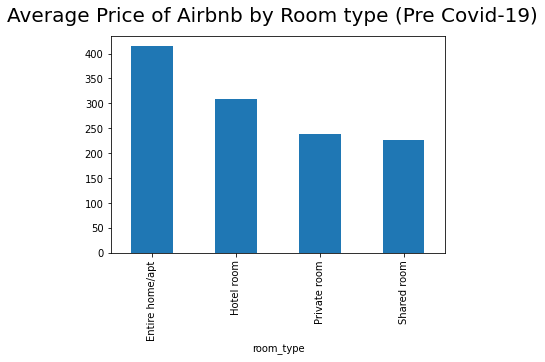

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Room type (Pre Covid-19)', fontsize=20)

seat.groupby(seat['room_type'])['price'].mean().plot.bar()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1440x432 with 0 Axes>

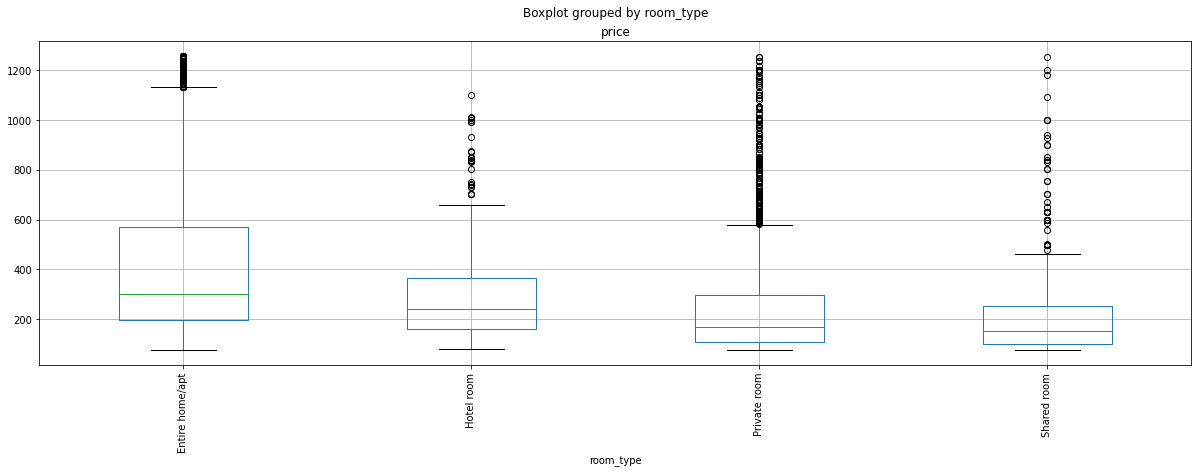

In [ ]:
fig = plt.figure(figsize = (20,6))
fig.suptitle('Box plot for type of room and price (Pre Covid-19)', fontsize=20)
seat.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)


This scatter plot shows the geographical location of all the properties in the dataset and their prices. In general its evident to see that properities are densely populated in the center of seattle. Furthermore, the graph shows that the closer you get to the center the more expensive properties will be. 

<Figure size 1440x432 with 0 Axes>

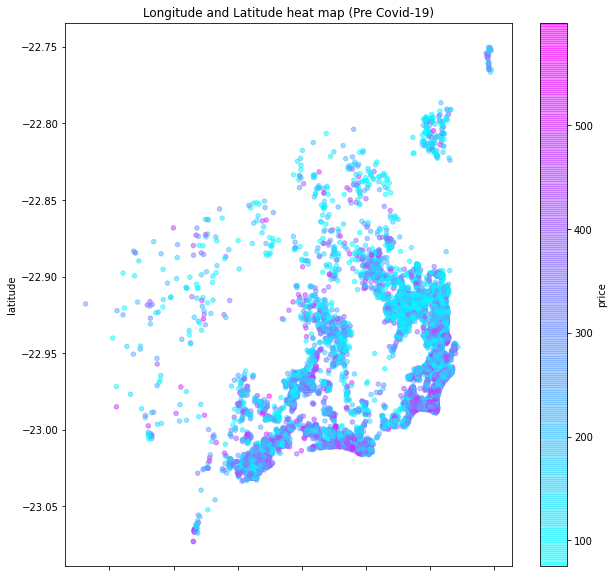

In [ ]:
fig = plt.figure(figsize = (20,6))
fig.suptitle('Log Price distribution plot(Pre Covid-19)', fontsize=20)

seat[seat['price']<600].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), title = 'Longitude and Latitude heat map (Pre Covid-19)', cmap='cool', alpha=0.5)

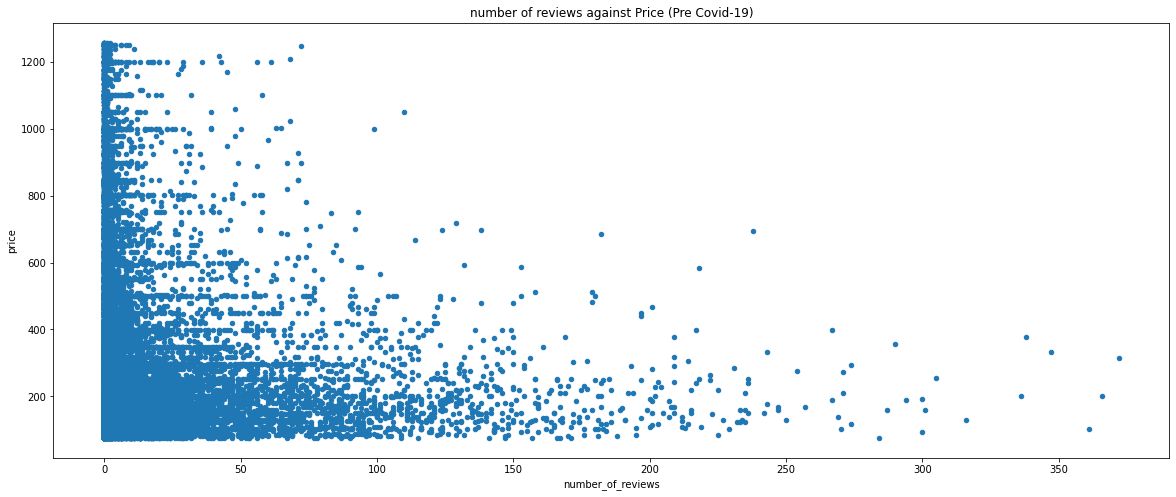

In [ ]:
seat.plot.scatter(x='number_of_reviews', y='price', figsize=(20,8),  title = 'number of reviews against Price (Pre Covid-19)')

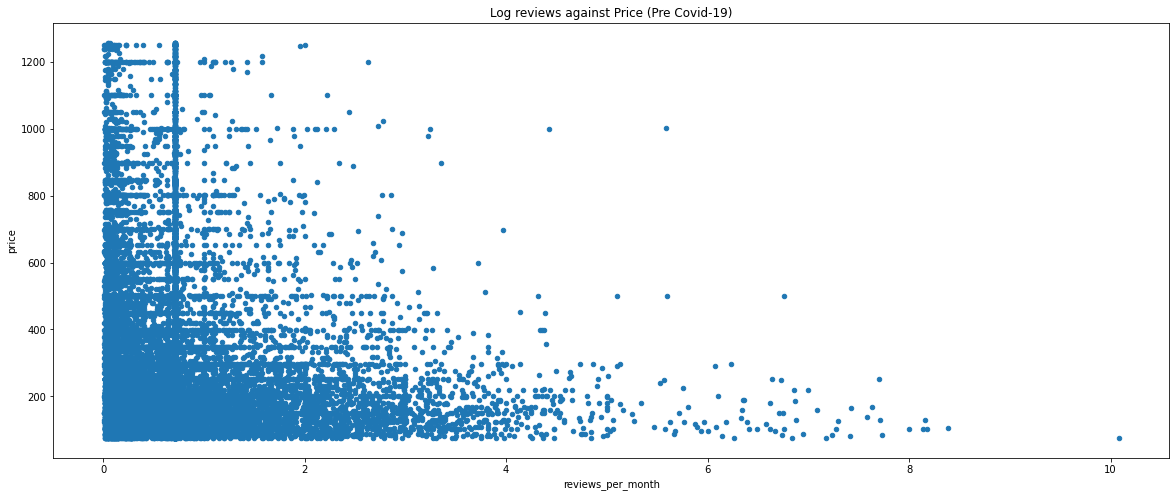

In [ ]:
seat.plot.scatter(x='reviews_per_month', y='price', figsize=(20,8),  title = 'Log reviews against Price (Pre Covid-19)')

Text(0, 0.5, 'Price')

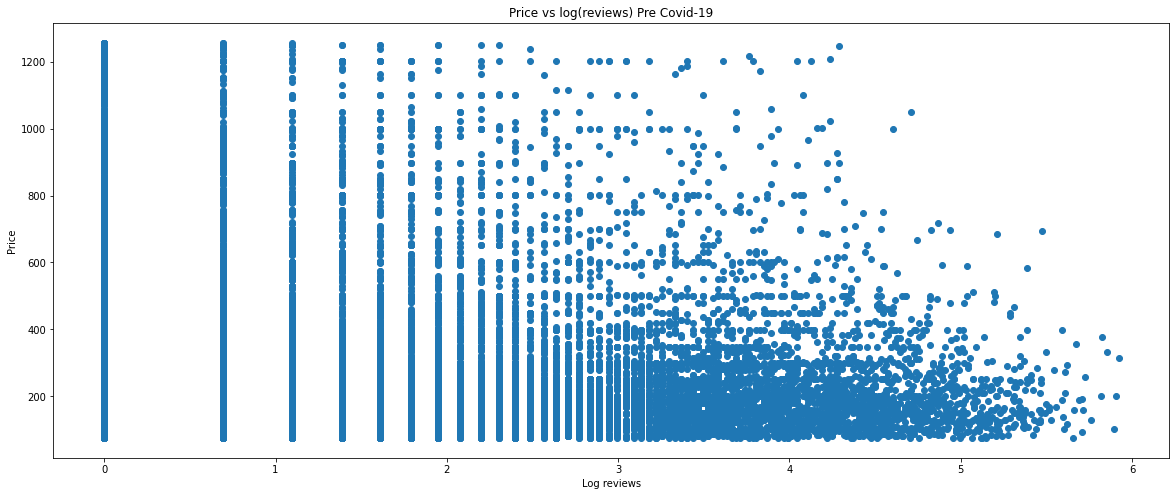

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+seat['number_of_reviews']), seat['price'])
plt.title('Price vs log(reviews) Pre Covid-19')
plt.xlabel('Log reviews')
plt.ylabel('Price')

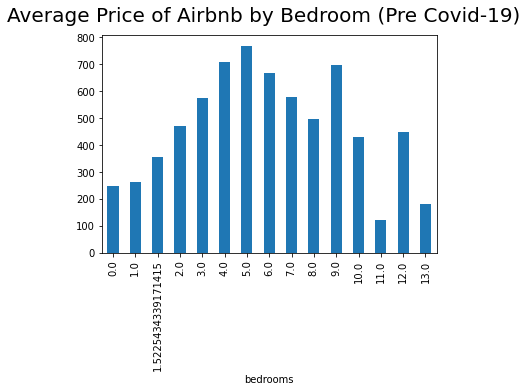

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Bedroom (Pre Covid-19)', fontsize=20)

seat.groupby(seat['bedrooms'])['price'].mean().plot.bar()

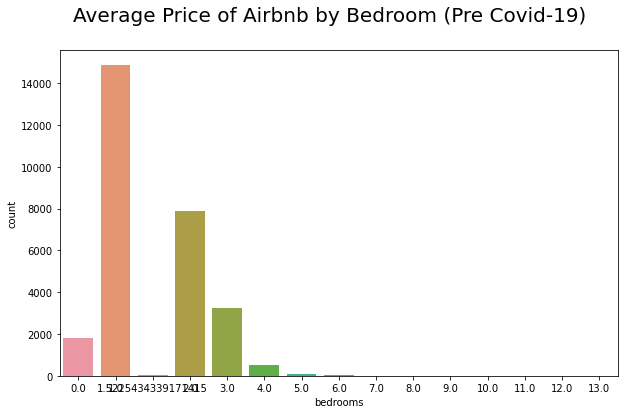

In [ ]:
fig = plt.figure(figsize = (10,6))
fig.suptitle('Average Price of Airbnb by Bedroom (Pre Covid-19)', fontsize=20)

sb.countplot(x ='bedrooms', data = seat)

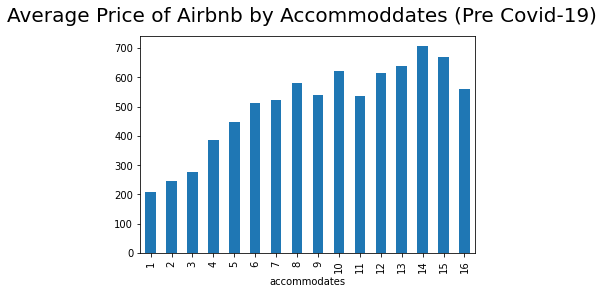

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Accommoddates (Pre Covid-19)', fontsize=20)

seat.groupby(seat['accommodates'])['price'].mean().plot.bar()

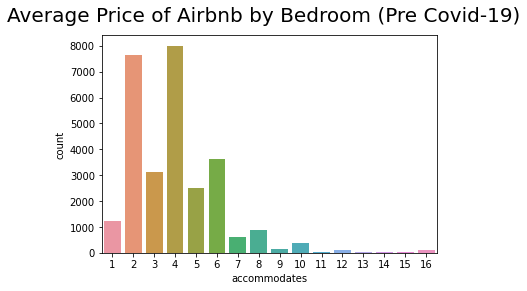

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Bedroom (Pre Covid-19)', fontsize=20)

sb.countplot(x ='accommodates', data = seat)

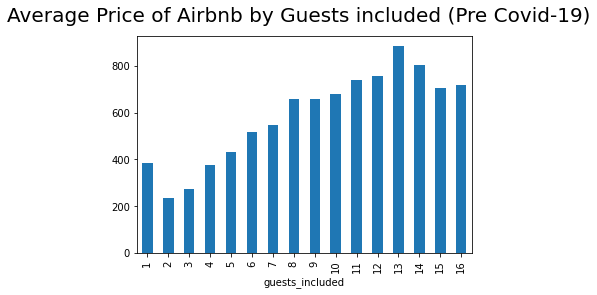

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Guests included (Pre Covid-19)', fontsize=20)

seat.groupby(seat['guests_included'])['price'].mean().plot.bar()

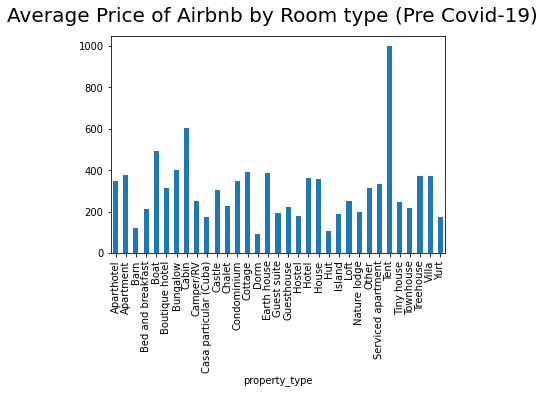

In [ ]:
fig = plt.figure()
fig.suptitle('Average Price of Airbnb by Room type (Pre Covid-19)', fontsize=20)

seat.groupby(seat['property_type'])['price'].mean().plot.bar()

In [ ]:
# Feature engineering 
seat['logreviews'] = np.log(1 + seat['number_of_reviews'])
seat['bedrooms_per_accommodates'] = seat['bedrooms'] / seat['accommodates']

In [ ]:
seat.select_dtypes('object').columns

Index(['listing_url', 'last_scraped', 'summary', 'space',
       'experiences_offered', 'host_url', 'host_response_time',
       'host_is_superhost', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'extra_people', 'has_availability',
       'calendar_last_scraped', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [ ]:
seat = seat.drop(['listing_url', 'last_scraped', 'host_url', 'host_verifications', 'amenities', 'calendar_last_scraped' ], axis = 1)

In [ ]:
seat.select_dtypes('object').columns

Index(['summary', 'space', 'experiences_offered', 'host_response_time',
       'host_is_superhost', 'street', 'neighbourhood_cleansed',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'extra_people',
       'has_availability', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [ ]:
seat = seat.drop(['summary', 'space', 'experiences_offered',
        'street', 'smart_location', 'country_code', 'country', 'is_location_exact', 'bed_type', 'extra_people',
        'requires_license','is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'], axis = 1)

In [ ]:
seat.head()

,id,scrape_id,host_id,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,logreviews,bedrooms_per_accommodates
0,17878,20191122092441,68997,within an hour,t,2.0,2.0,Copacabana,-22.96592,-43.17896,Condominium,Entire home/apt,5,2.0,2.0,332.0,2,4,30,4,4,30,30,4.0,30.0,t,23,31,35,303,243,27,93.0,9.0,10.0,10.0,10.0,10.0,9.0,t,1,1,0,0,2.13,5.805135,5.497168,0.400000
1,25026,20191122092441,102840,within a day,f,3.0,3.0,Copacabana,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,2.0,160.0,2,7,60,7,7,60,60,7.0,60.0,t,16,22,35,119,235,17,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,3,3,0,0,2.04,5.075174,5.463832,0.500000
2,31560,20191122092441,135635,within an hour,t,1.0,1.0,Ipanema,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,2.0,273.0,2,2,1125,2,5,1125,1125,2.1,1125.0,t,2,5,9,88,271,42,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,1,0,0,2.38,5.609472,5.605802,0.333333
3,35636,20191122092441,153232,within an hour,t,1.0,1.0,Ipanema,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.0,2.0,378.0,2,2,89,2,2,89,89,2.0,89.0,t,5,6,17,85,169,35,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0,2.28,5.934894,5.135798,0.333333
4,35764,20191122092441,153691,within an hour,t,1.0,1.0,Copacabana,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,130.0,2,3,28,3,3,28,28,3.0,28.0,t,4,6,12,128,316,40,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,2.84,4.867534,5.758902,0.500000


In [ ]:
seat.columns

Index(['id', 'scrape_id', 'host_id', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes'

In [ ]:
seat.isna().sum()

id                                              0
scrape_id                                       0
host_id                                         0
host_response_time                              0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
guests_included                                 0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0


In [ ]:
seat['instant_bookable'].unique()

array(['t', 'f'], dtype=object)

In [ ]:
seat = seat.drop(['guests_included'], axis = 1)

In [ ]:

data = seat.copy()
print('amount of data original: ' + str(len(data)))
data = data[data['number_of_reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
print('amount of data after removing "few reviews" properties: ' + str(len(data)))

amount of data original: 28472
amount of data after removing "few reviews" properties: 5667


In [ ]:
data = pd.get_dummies(data)
data.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,logreviews,bedrooms_per_accommodates,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,neighbourhood_cleansed_Alto da Boa Vista,neighbourhood_cleansed_Andaraí,neighbourhood_cleansed_Anil,neighbourhood_cleansed_Barra da Tijuca,neighbourhood_cleansed_Barra de Guaratiba,neighbourhood_cleansed_Botafogo,neighbourhood_cleansed_Cacuia,neighbourhood_cleansed_Camorim,neighbourhood_cleansed_Campo Grande,neighbourhood_cleansed_Catete,neighbourhood_cleansed_Centro,neighbourhood_cleansed_Cidade Nova,neighbourhood_cleansed_Copacabana,neighbourhood_cleansed_Cosme Velho,neighbourhood_cleansed_Curicica,neighbourhood_cleansed_Del Castilho,neighbourhood_cleansed_Engenho Novo,neighbourhood_cleansed_Estácio,neighbourhood_cleansed_Flamengo,neighbourhood_cleansed_Freguesia (Jacarepaguá),neighbourhood_cleansed_Galeão,neighbourhood_cleansed_Gamboa,neighbourhood_cleansed_Gardênia Azul,neighbourhood_cleansed_Glória,neighbourhood_cleansed_Grajaú,neighbourhood_cleansed_Guaratiba,neighbourhood_cleansed_Gávea,neighbourhood_cleansed_Humaitá,neighbourhood_cleansed_Inhaúma,neighbourhood_cleansed_Ipanema,neighbourhood_cleansed_Itanhangá,neighbourhood_cleansed_Jacarepaguá,neighbourhood_cleansed_Jardim Botânico,neighbourhood_cleansed_Jardim Carioca,neighbourhood_cleansed_Jardim Guanabara,neighbourhood_cleansed_Jardim Sulacap,neighbourhood_cleansed_Joá,neighbourhood_cleansed_Lagoa,neighbourhood_cleansed_Laranjeiras,neighbourhood_cleansed_Leblon,neighbourhood_cleansed_Leme,neighbourhood_cleansed_Madureira,neighbourhood_cleansed_Mangueira,neighbourhood_cleansed_Maracanã,neighbourhood_cleansed_Paquetá,neighbourhood_cleansed_Parada de Lucas,neighbourhood_cleansed_Penha,neighbourhood_cleansed_Portuguesa,neighbourhood_cleansed_Praça da Bandeira,neighbourhood_cleansed_Recreio dos Bandeirantes,neighbourhood_cleansed_Rio Comprido,neighbourhood_cleansed_Rocha,neighbourhood_cleansed_Santa Cruz,neighbourhood_cleansed_Santa Teresa,neighbourhood_cleansed_Senador Vasconcelos,neighbourhood_cleansed_São Conrado,neighbourhood_cleansed_São Cristóvão,neighbourhood_cleansed_São Francisco Xavier,neighbourhood_cleansed_Taquara,neighbourhood_cleansed_Tijuca,neighbourhood_cleansed_Urca,neighbourhood_cleansed_Vargem Grande,neighbourhood_cleansed_Vargem Pequena,neighbourhood_cleansed_Vidigal,neighbourhood_cleansed_Vila Isabel,neighbourhood_cleansed_Vila Militar,neighbourhood_cleansed_Vila Valqueire,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Island,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_f,instant_bookable_t
0,17878,20191122092441,68997

In [ ]:
X = data.copy().drop(['log_price', 'price'], axis = 1)
y = data['log_price'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
baseline = y_train.median() #median train
print('If we just take the median value, our baseline, we would say that an overnight stay in seattle costs: ' + str(baseline))

If we just take the median value, our baseline, we would say that an overnight stay in seattle costs: 5.241747015059643


In [ ]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 0.5941451248504618


In [ ]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [ ]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train)))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test)))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


LinearRegression mrse_train: 1.4719549172946322, mrse_test: inf
Ridge mrse_train: 1.473272219547728, mrse_test: 1.481735383845822 best alpha: 50.0
Lasso mrse_train: 1.4886435086048984, mrse_test: 1.49038156729086 best alpha: 0.01
ElasticNet mrse_train: 1.477150834358011, mrse_test: 1.4837805584671782 best alpha: 0.01 best l1: 0.3


In [ ]:
print('LR R^2 score:', lr.score(X_test_scaled, y_test))
print('Ridge R^2 score:', ridge.score(X_test_scaled, y_test))
print('Lasso R^2 score:', lasso.score(X_test_scaled, y_test))


LR R^2 score: -6.041443605295332e+18
Ridge R^2 score: 0.5536845502734051
Lasso R^2 score: 0.5403789654277684


In [ ]:
print('LR R^2 score:', lr.score(X_train_scaled, y_train))
print('Ridge R^2 score:', ridge.score(X_train_scaled, y_train))
print('Lasso R^2 score:', lasso.score(X_train_scaled, y_train))


LR R^2 score: 0.5564244180424323
Ridge R^2 score: 0.554369264479574
Lasso R^2 score: 0.5301757652712578


In [ ]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

bedrooms, 0.22798882089946668
neighbourhood_cleansed_Ipanema, 0.08274297118789918
review_scores_rating, 0.0763325614867172
accommodates, 0.06504616837610774
neighbourhood_cleansed_Leblon, 0.06293246391593325
availability_365, 0.03146368866091158
property_type_Serviced apartment, 0.024731754144582205
neighbourhood_cleansed_Paquetá, 0.018811947648956006
longitude, 0.015423766163465387
beds, 0.006514038972695394
neighbourhood_cleansed_Urca, 0.006183733936917948
neighbourhood_cleansed_Itanhangá, 0.006128589737005996
neighbourhood_cleansed_Jardim Guanabara, 0.005505518866954552
neighbourhood_cleansed_Lagoa, 0.0045179082913994655
review_scores_location, 0.0037948034231863035
property_type_Aparthotel, 0.00346557044491455
availability_30, 0.0033832520846910734
neighbourhood_cleansed_Barra da Tijuca, 0.0033312287654118007
room_type_Hotel room, 0.0015812596512523264
neighbourhood_cleansed_Joá, 0.0011524737076880674
neighbourhood_cleansed_Jardim Carioca, 0.0007757681787174356


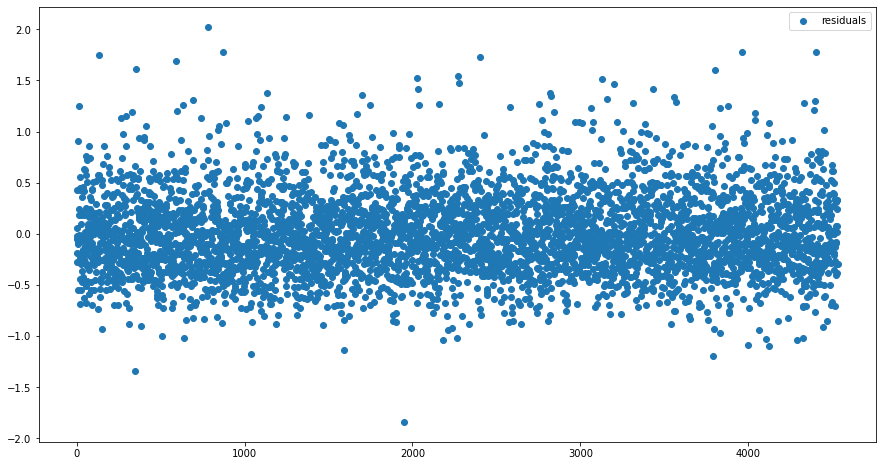

In [ ]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

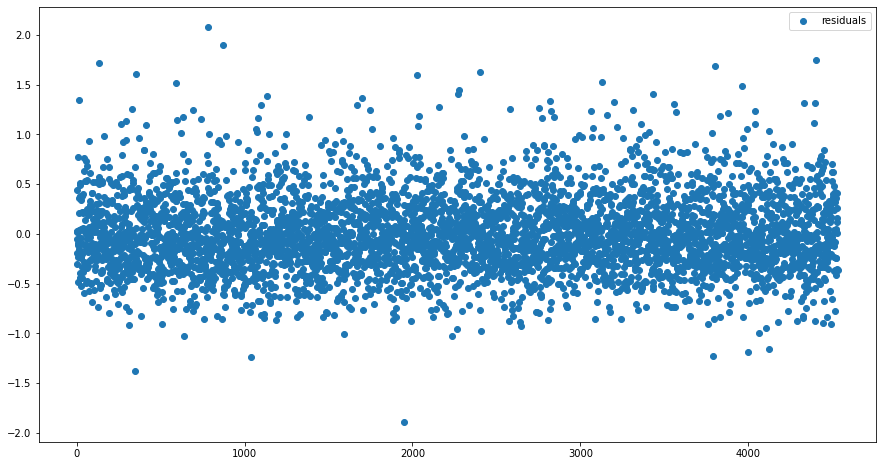

In [ ]:
y_pred_train = lr.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

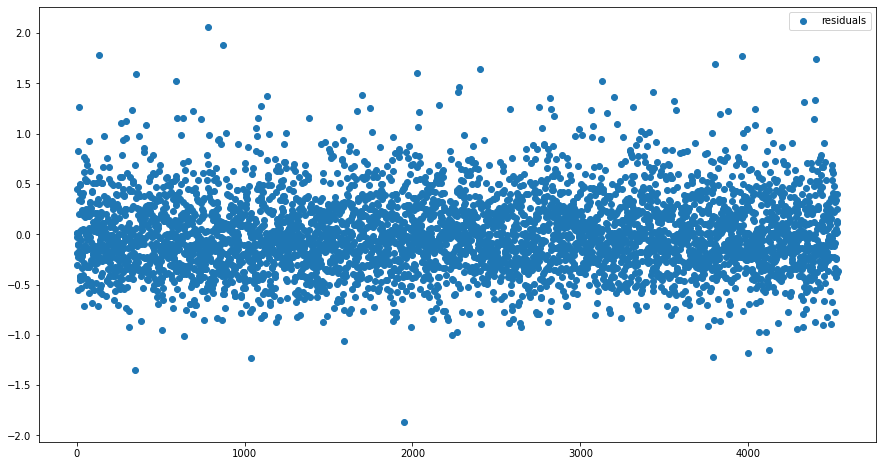

In [ ]:
y_pred_train = ridge.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [ ]:
no_bootstrap_model = RandomForestRegressor(n_estimators=100, criterion = 'mse', bootstrap = False)
no_bootstrap_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(bootstrap=False, criterion='mse')

In [ ]:
bootstrap_model = RandomForestRegressor(n_estimators=100, criterion = 'mse', bootstrap = True)
bootstrap_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [ ]:
print('R^2 without bootsrapping:', no_bootstrap_model.score(X_test_scaled, y_test))
print('R^2 with bootsrapping:', bootstrap_model.score(X_test_scaled, y_test))

R^2 without bootsrapping: 0.1319161387688369
R^2 with bootsrapping: 0.5672042458812756


In [ ]:
print('R^2 with bootsrapping:', bootstrap_model.score(X_train_scaled, y_train))

R^2 with bootsrapping: 0.9370603191666859


In [ ]:
y_pred_train = bootstrap_model.predict(X_train_scaled)
mrse_train = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train)))
y_pred = bootstrap_model.predict(X_test_scaled)
mrse_test = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test)))
print(' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))
print(' MSE: ' + str(mean_squared_error(y_pred=y_pred, y_true=y_test)))

 mrse_train: 1.1567602631603369, mrse_test: 1.472869563326939
 MSE: 0.14993358354037692


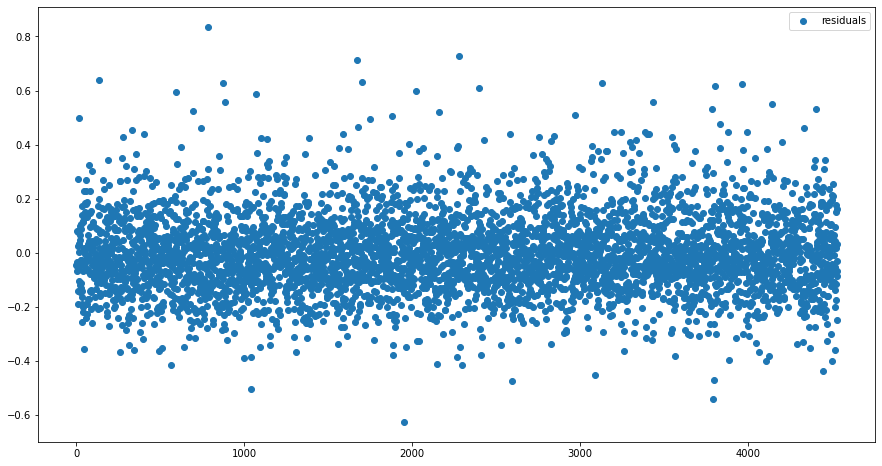

In [ ]:
y_pred_train = bootstrap_model.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [ ]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train_scaled, y_train)

[16:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
regressor = xgboost.XGBRegressor()

In [ ]:
boosters = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

In [ ]:
## hyperparameter optimisation

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]

# define the grid hyperparamaters search

hyperparamater_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator = regressor,
                               param_distributions = hyperparamater_grid, 
                               cv = 5, n_iter = 50,
                               scoring = 'neg_mean_absolute_error', n_jobs = 4,
                               verbose = 5,
                               return_train_score = True,
                               random_state = 42)

In [ ]:
random_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: ignored

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, learning_rate=0.05, max_depth=2,
             min_child_weight=4, n_estimators=900)

In [ ]:
regressor = xgboost.XGBRegressor(base_score=0.25, learning_rate=0.05, max_depth=2,
             min_child_weight=4, n_estimators=900)

In [ ]:
regressor.fit(X_train_scaled, y_train)

[16:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, learning_rate=0.05, max_depth=2,
             min_child_weight=4, n_estimators=900)

In [ ]:
y_pred_train = regressor.predict(X_train_scaled)
mrse_train = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train)))
y_pred = regressor.predict(X_test_scaled)
mrse_test = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test)))
print(' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

 mrse_train: 1.4011944935765324, mrse_test: 1.4501833429750013


In [ ]:
print('R^2 score:', regressor.score(X_test_scaled, y_test))


R^2 score: 0.6012085805632856


In [ ]:
print('R^2 score:', regressor.score(X_train_scaled, y_train))

R^2 score: 0.6622770764817401


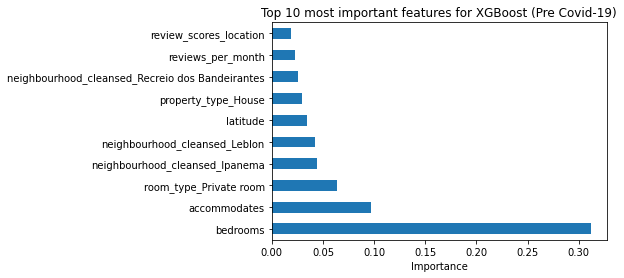

In [ ]:
feature_importance = pd.Series(regressor.feature_importances_, index = X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 most important features for XGBoost (Pre Covid-19)")
plt.xlabel("Importance")
plt.show()

In [ ]:
seat.shape

(28472, 47)

In [ ]:
from sklearn.svm import SVR
LL_svr = SVR().fit(X_train_scaled, y_train)

In [ ]:
LL_svr.score(X_test_scaled, y_test)

0.5555911457606997

In [ ]:
LL_svr.score(X_train_scaled, y_train)

0.6864421697575123

In [ ]:
y_pred_train = LL_svr.predict(X_train_scaled)
mrse_train = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train)))
y_pred = LL_svr.predict(X_test_scaled)
mrse_test = np.exp(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test)))
print(' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test))

 mrse_train: 1.384076044402673, mrse_test: 1.480490100391367
